In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../files/abc_clean.csv", index_col=0)
df.head()

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,No,Unknown,2015.72,Unknown,6,3,Unknown,1,1,Male,NaN,3,5,Research Director,3,Unknown,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,1972,195370.0,Yes
1,No,Unknown,2063.39,Unknown,1,4,Life Sciences,2,3,Male,NaN,2,5,Manager,3,Unknown,NaN,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,1971,199990.0,Yes
2,No,Rarely,1984.25,Research & Development,4,2,Technical Degree,3,3,Male,NaN,3,5,Manager,4,Married,NaN,41669.33,1,No,11,3.0,4,Unknown,0,22.0,3,3.0,22,11,15,1981,192320.0,Yes
3,No,Rarely,1771.40,Unknown,2,4,Medical,4,1,Female,NaN,3,4,Research Director,3,Married,14307.50,37199.50,3,Unknown,19,3.0,2,Full Time,2,NaN,2,3.0,20,5,6,1976,171690.0,No
4,No,Unknown,1582.77,Unknown,3,3,Technical Degree,5,1,Female,NaN,4,4,Sales Executive,1,Divorced,12783.92,33238.20,2,No,12,3.0,4,Unknown,1,NaN,5,3.0,19,2,8,1977,NaN,No


In [3]:
# Visualizaciones de:
#  standardhours (cat)
# , yearsatcompany -yearsincurrentrole (NO LA TENEMOS EN EL DATA YA), (num)
# performancerating (cat-num)
# ("enviroment")(cat-num)
# salary (num)
# jobrole, department (cat)
# gender (cat)

## Standarhours

<Axes: xlabel='jobsatisfaction', ylabel='standardhours'>

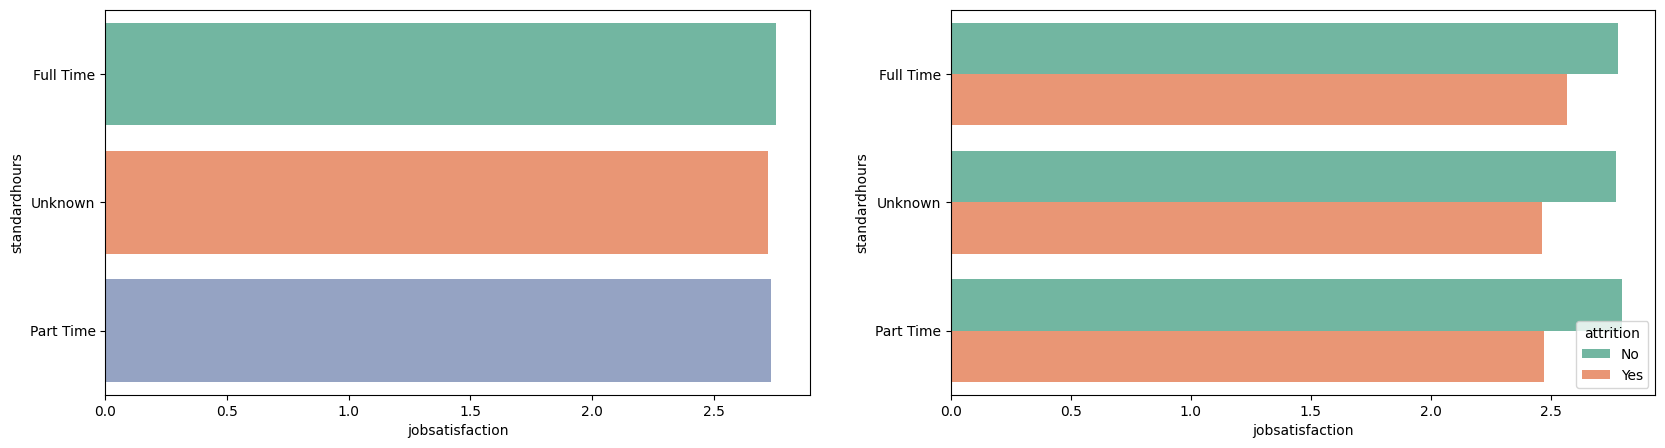

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="standardhours", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="standardhours", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])

- standardhours (calificación de la jornada, muchos nulos que no eran sustiubles) con jobsatisfaction
 En la primera gráfica sin tener en cuenta 'attrition', se puede ver que las tendencias son iguales, por lo que se prescinde del hue. Hay muchos datos desconocidos. Igual que cuando le apsamos el parámetro hue = 'attrition', no relevante.


## Yearsatcompany

<Axes: xlabel='jobsatisfaction', ylabel='yearsatcompany'>

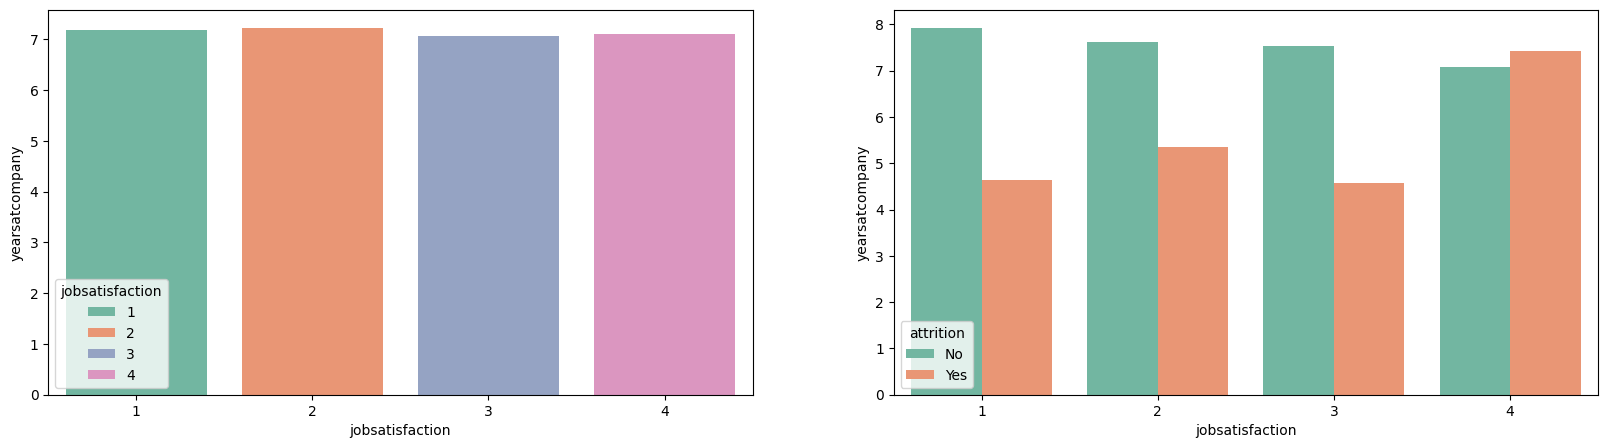

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="yearsatcompany", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="yearsatcompany", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])

-yearsatcompany: izq: Las barras son muy similares en altura, lo que sugiere que la satisfacción laboral no parece influir mucho en los años en la empresa.
dcha:Se observa que las personas que permanecen en la empresa (No attrition) tienen más años en la empresa en comparación con aquellas que la abandonan (Yes attrition).

En los niveles bajos de jobsatisfaction (1 y 3), los empleados que dejan la empresa tienen significativamente menos años en ella.

En el nivel de jobsatisfaction 4, los empleados que se quedan y los que se van tienen una permanencia más equilibrada, lo que puede indicar que la alta satisfacción ayuda a retener empleados por más tiempo.
La tasa de deserción es más alta cuando los empleados tienen menos años en la empresa y baja satisfacción laboral.

Una estrategia para retener talento podría enfocarse en mejorar la satisfacción laboral, especialmente en los primeros años de trabajo.

### Performancerating

<Axes: xlabel='jobsatisfaction', ylabel='performancerating'>

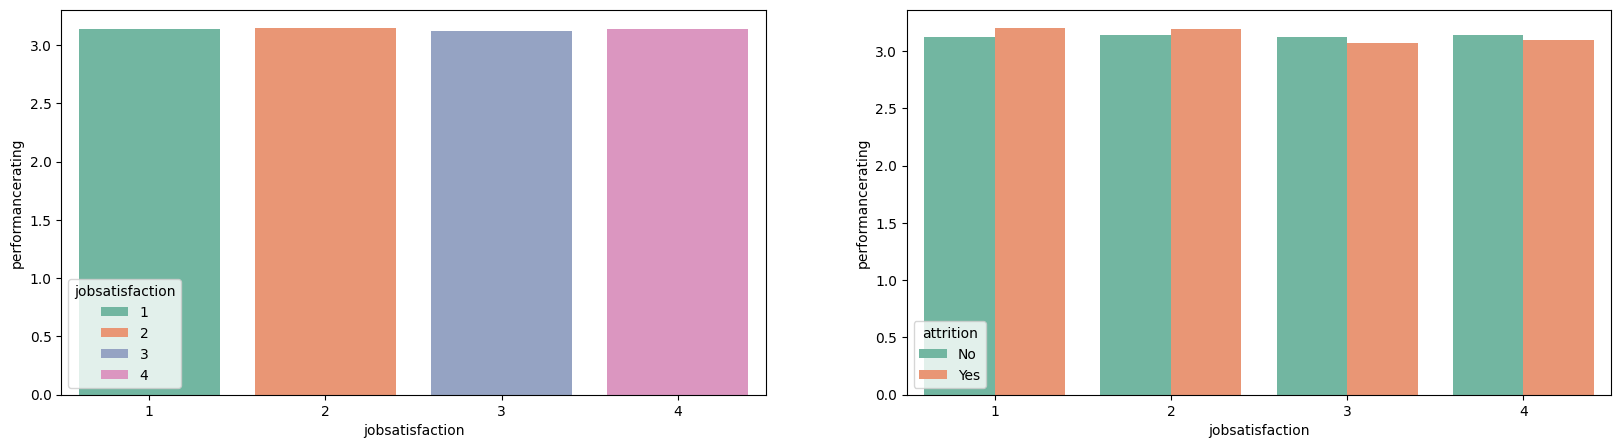

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="performancerating", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="performancerating", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])

-performancerating :indica que la satisfacción laboral no parece estar directamente relacionada con una mejora o disminución en el desempeño evaluado. No hay relación entre satisfacción laboral y desempeño evaluado.

### Salary (con enviromentsatisfaction)

<Axes: xlabel='environmentsatisfaction', ylabel='salary'>

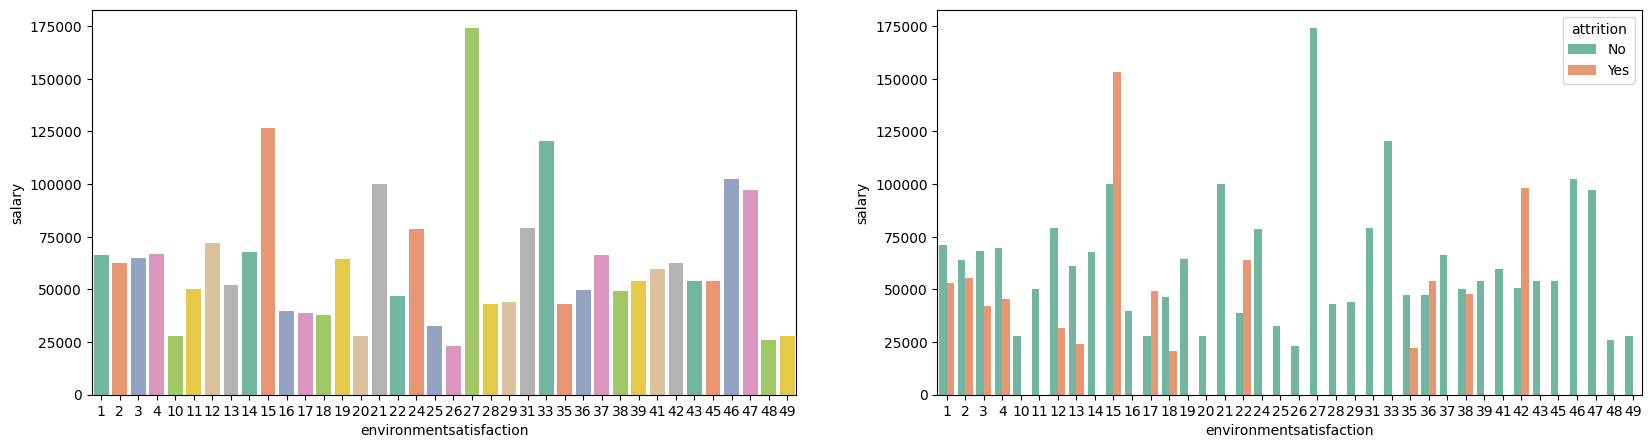

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="salary", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="salary", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])

- No veo relaciones claras, al menos de forma visual. En la gráfica de correlación tenía un 0,5 con distancefromhome, pero un 0,5 no nos dice nada.

### jobrole

<Axes: xlabel='environmentsatisfaction', ylabel='jobrole'>

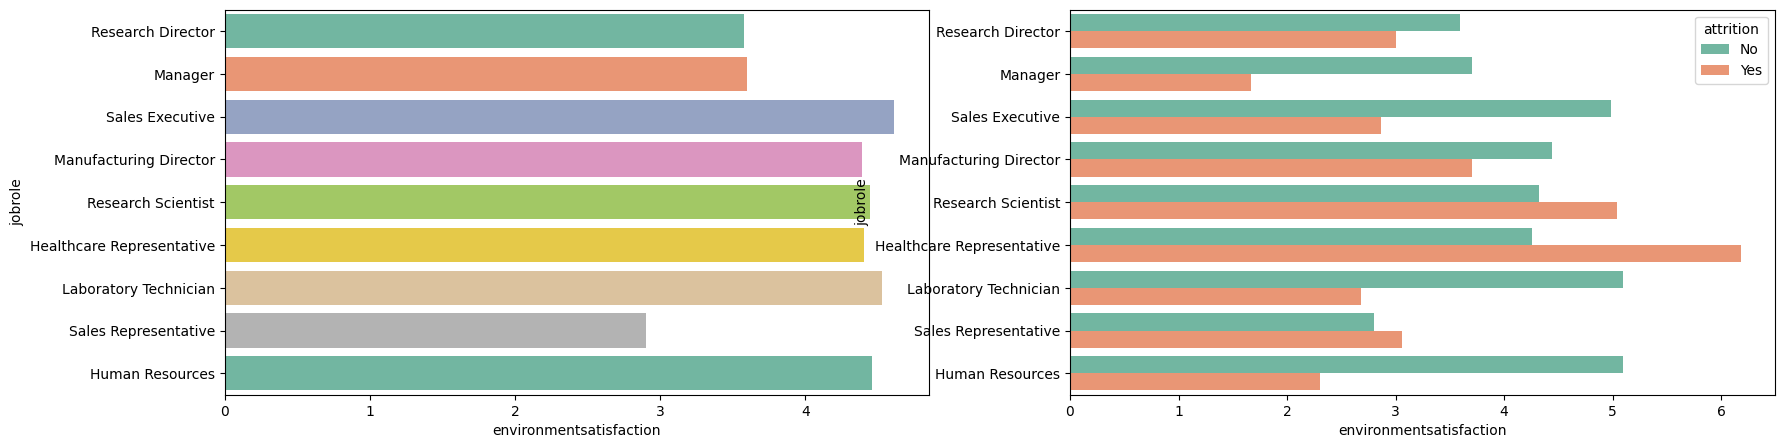

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="jobrole", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="jobrole", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])

- Sales represetative, tiene un bajo nivel en enviromentsatisfaction, por ello más empleados se van de los que se quedan. En cambio Human Reosurces, es al contrario, los que se quedan tienen un gran nivel de satisfacción.
Por lo general no encuentro relacion.

### department

Tenemos muchos datos desconocidos...

<Axes: xlabel='environmentsatisfaction', ylabel='department'>

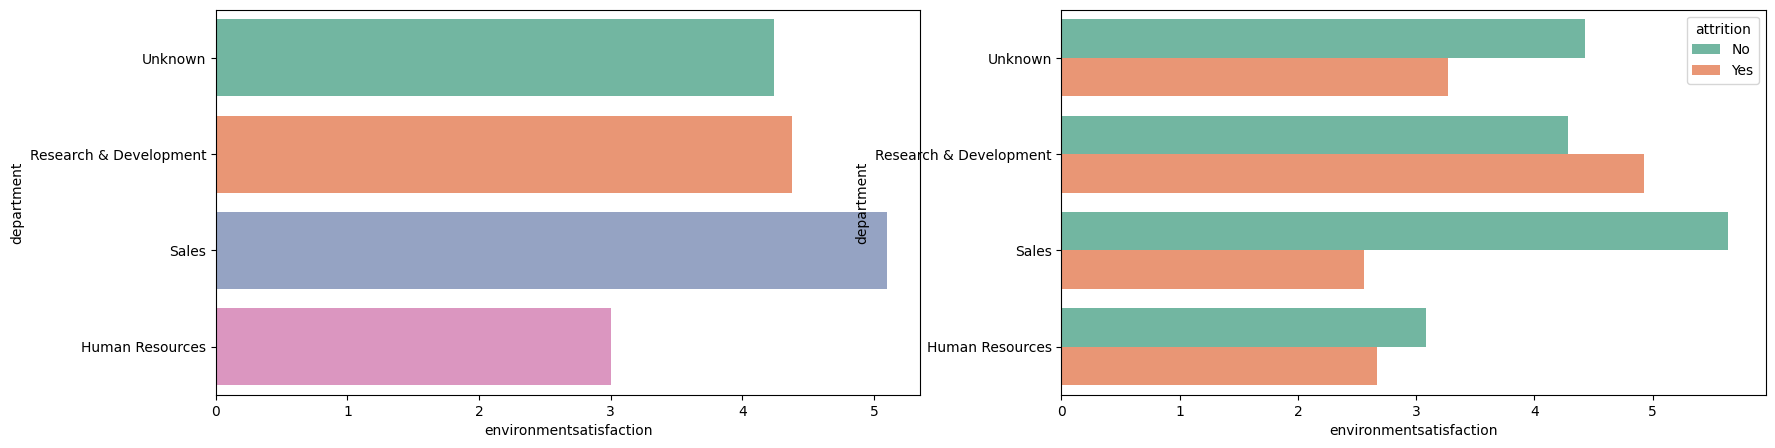

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="department", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="department", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])

### gender

<Axes: xlabel='environmentsatisfaction', ylabel='gender'>

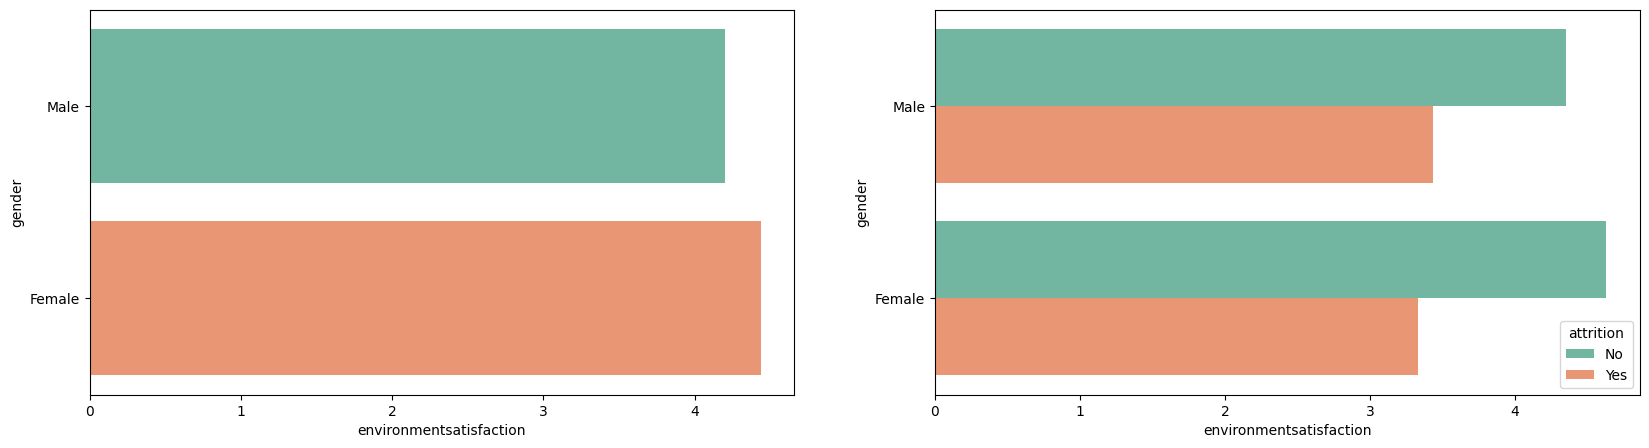

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="gender", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="gender", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])

 No existen diferencias significativas.

<Axes: xlabel='count', ylabel='performancerating'>

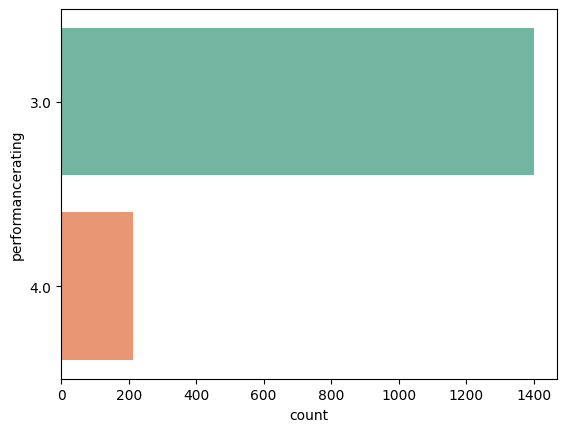

In [11]:
sns.countplot(y='performancerating', data=df, palette="Set2") 

# Los trabajadores están más insatisfechos que satisfechos.

<Axes: xlabel='count', ylabel='standardhours'>

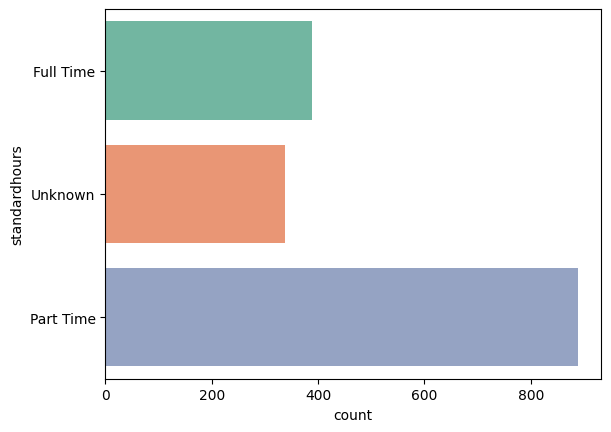

In [12]:
sns.countplot(y='standardhours', data=df, palette="Set2") 

# Más turnos partidos, que full time

In [13]:
df['gender'].value_counts()

gender
Male      971
Female    643
Name: count, dtype: int64

<Axes: xlabel='standardhours', ylabel='gender'>

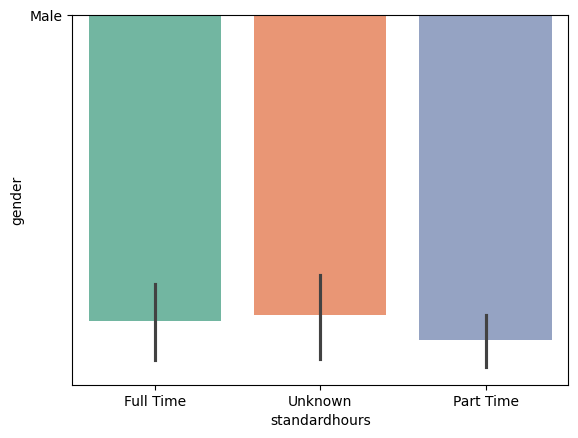

In [17]:
sns.barplot(y="gender", 
            x="standardhours", 
            data=df, 
            palette="Set2")

In [24]:
tabla_contingencia = pd.crosstab(df['gender'], df['jobrole'], normalize=True) * 100

In [25]:
tabla_contingencia

jobrole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
gender,,,,,,,,,
Female,3.841388,1.053284,5.700124,3.035936,4.894672,2.168525,7.434944,9.231722,2.478315
Male,5.390335,2.478315,11.524164,3.841388,4.894672,3.283767,12.019827,13.630731,3.097893


<Axes: xlabel='environmentsatisfaction', ylabel='standardhours'>

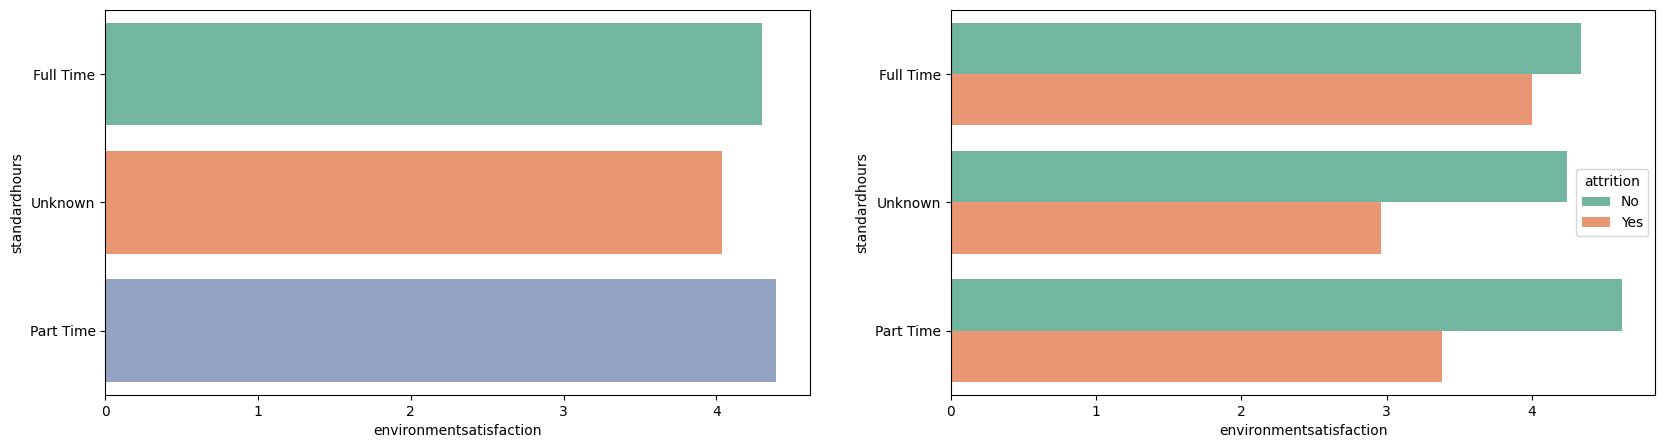

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(y="standardhours", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="standardhours", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])